In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
tf.__version__

2024-10-09 12:25:50.474174: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


'2.16.2'

In [383]:
def create_model():

    model = tf.keras.models.Sequential([ 
        
        tf.keras.layers.Input(shape = (64, 64, 3),),
        tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = 2), 
        
#         tf.keras.layers.Conv2D(64, (5,5), activation='relu',),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = 2),
        
#         tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#         tf.keras.layers.BatchNormalization(),
#         tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = 2),
        
        tf.keras.layers.Conv2D(128, (5,5), activation='relu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.MaxPooling2D(pool_size=(2,2), strides = 2),

        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(256, activation='relu'),
        tf.keras.layers.Dense(149, activation='softmax')
  ])
    
    
    opt = tf.keras.optimizers.Adam(learning_rate=0.01)
    
    model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
  
    return model



In [384]:
model = create_model()

In [385]:
model.summary()

Model: "sequential_89"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_24          │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 27, 27, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_25          │ (None, 27, 27, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 13, 13, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_15 (Flatten)            │ (None, 21632)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 256)            │     5,538,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 149)            │        38,293 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,783,829 (22.06 MB)

 Trainable params: 5,783,445 (22.06 MB)

 Non-trainable params: 384 (1.50 KB)

In [392]:
train_ds = tf.data.Dataset.load("tf_data/trains_ds")
val_ds = tf.data.Dataset.load("tf_data/val_ds")

batch_size = 32
AUTOTUNE = tf.data.AUTOTUNE

IMG_SIZE = 64

resize_and_rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
    layers.Rescaling(1.)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.2),
])

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
    ds = ds.map(lambda x, y: (resize_and_rescale(x), y), 
              num_parallel_calls=AUTOTUNE)

    if shuffle:
        ds = ds.shuffle(1000)

  # Batch all datasets.
        ds = ds.rebatch(batch_size)

  # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
    return ds.prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)
val_ds

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 64, 64, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 149), dtype=tf.float32, name=None))>

In [161]:
train_aug = models.Sequential([
        tf.keras.layers.Input(shape = (200, 200, 3),),
        tf.keras.layers.Rescaling(1.0/255),
        tf.keras.layers.Resizing(height=120, width=120),
        tf.keras.layers.RandomRotation(factor=0.2, value_range=[0., 1.] ),
        tf.keras.layers.RandomFlip(mode="horizontal"),
        tf.keras.layers.RandomCrop(height=100, width=100),
])

val_aug= models.Sequential([
        tf.keras.layers.Input(shape = (200, 200, 3),),
        tf.keras.layers.Rescaling(1.0/255),
        tf.keras.layers.Resizing(height=100, width=100),
])

In [164]:
train_ds = tf.data.Dataset.load("tf_data/trains_ds")
val_ds = tf.data.Dataset.load("tf_data/val_ds"


train_ds = (
    train_ds
    .map(lambda x, y: (train_aug(x), y),
        num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)

val_ds = (
    val_ds
    .map(lambda x, y: (val_aug(x), y),
        num_parallel_calls=tf.data.AUTOTUNE)
    .prefetch(tf.data.AUTOTUNE)
)


In [387]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20,  restore_best_weights=True)

opt = tf.keras.optimizers.Adam(learning_rate=0.00001)


model.compile(loss='categorical_crossentropy',
                optimizer=opt,
                metrics=['accuracy'])
# model.load_weights("model_00001.weights.h5")

model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=100,
    callbacks=[earlystop]
, steps_per_epoch = 766)

Epoch 1/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 619s 763ms/step - accuracy: 0.0200 - loss: 5.1307 - val_accuracy: 0.0048 - val_loss: 5.4831
Epoch 2/100


2024-10-05 09:51:20.420851: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]
/opt/anaconda3/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


766/766 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0048 - val_loss: 5.4831
Epoch 3/100
766/766 ━━━━━━━━━━━━━━━━━━━━ 609s 757ms/step - accuracy: 0.0752 - loss: 4.4490 - val_accuracy: 0.0074 - val_loss: 5.9203
Epoch 4/100


2024-10-05 10:01:40.138321: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


766/766 ━━━━━━━━━━━━━━━━━━━━ 18s 24ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0074 - val_loss: 5.9203
Epoch 5/100
 52/766 ━━━━━━━━━━━━━━━━━━━━ 9:04 762ms/step - accuracy: 0.1173 - loss: 4.1205

KeyboardInterrupt: 

In [70]:
model.save_weights("model_new_data.weights.h5")

In [393]:
# model.load_weights("model_00001.weights.h5")
model.evaluate(val_ds)

85/85 ━━━━━━━━━━━━━━━━━━━━ 12s 140ms/step - accuracy: 0.1113 - loss: 4.1307


[4.1776347160339355, 0.11323529481887817]

In [505]:
model.history.params

{'verbose': 'auto', 'epochs': 1, 'steps': 85}

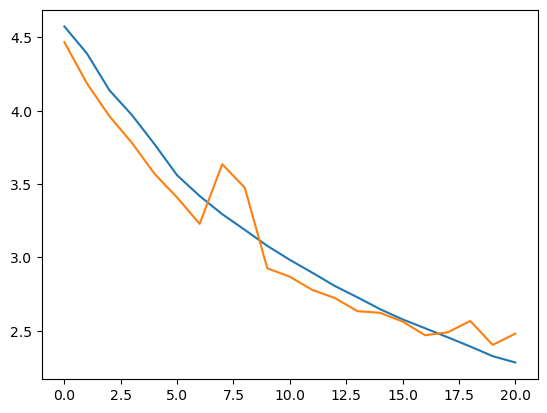

In [26]:
plt.plot(model.history.history["loss"])
plt.plot(model.history.history["val_loss"])

In [50]:
loss_00001 = model.history.history["loss"]
val_loss_00001 = model.history.history["val_loss"]

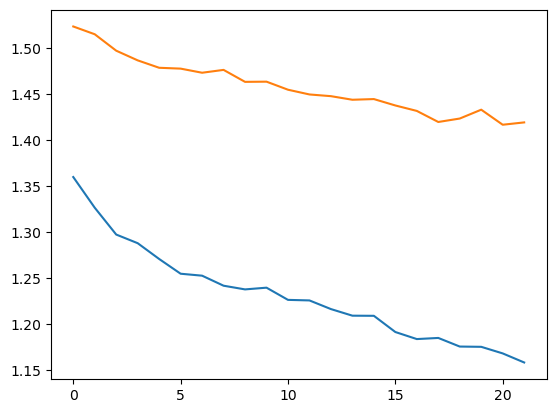

In [51]:
loss_00001 = model.history.history["loss"]
val_loss_00001 = model.history.history["val_loss"]
plt.plot(loss_00001)
plt.plot(val_loss_00001)

In [20]:
class_names = np.load("class_names.npy")

In [21]:
y_true = []
img_np = np.array(next(iter(val_ds))[0])
count = 0

for img_batch, label_batch in val_ds:
    for label in label_batch:
        y_true.append(class_names[np.argmax(np.array(label))])
    img_np = np.concatenate((img_np,img_batch))    

2024-10-04 14:44:00.189776: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


In [22]:
img_np = img_np[32:,:,:,:]
img_np.shape

(2720, 200, 200, 3)

In [23]:
y_pred = model.predict(val_ds)

85/85 ━━━━━━━━━━━━━━━━━━━━ 26s 299ms/step


In [24]:
len(y_pred)

2720

In [25]:
class_names = np.load("class_names.npy")

y_true = []
img_np = np.array(next(iter(val_ds))[0])
count = 0

for img_batch, label_batch in val_ds:
    for label in label_batch:
        y_true.append(class_names[np.argmax(np.array(label))])
    img_np = np.concatenate((img_np,img_batch))

y_pred = model.predict(val_ds)
y_pred_lab = []

for pred in y_pred:
    y_pred_lab.append(class_names[np.argmax(pred)])


<Axes: >

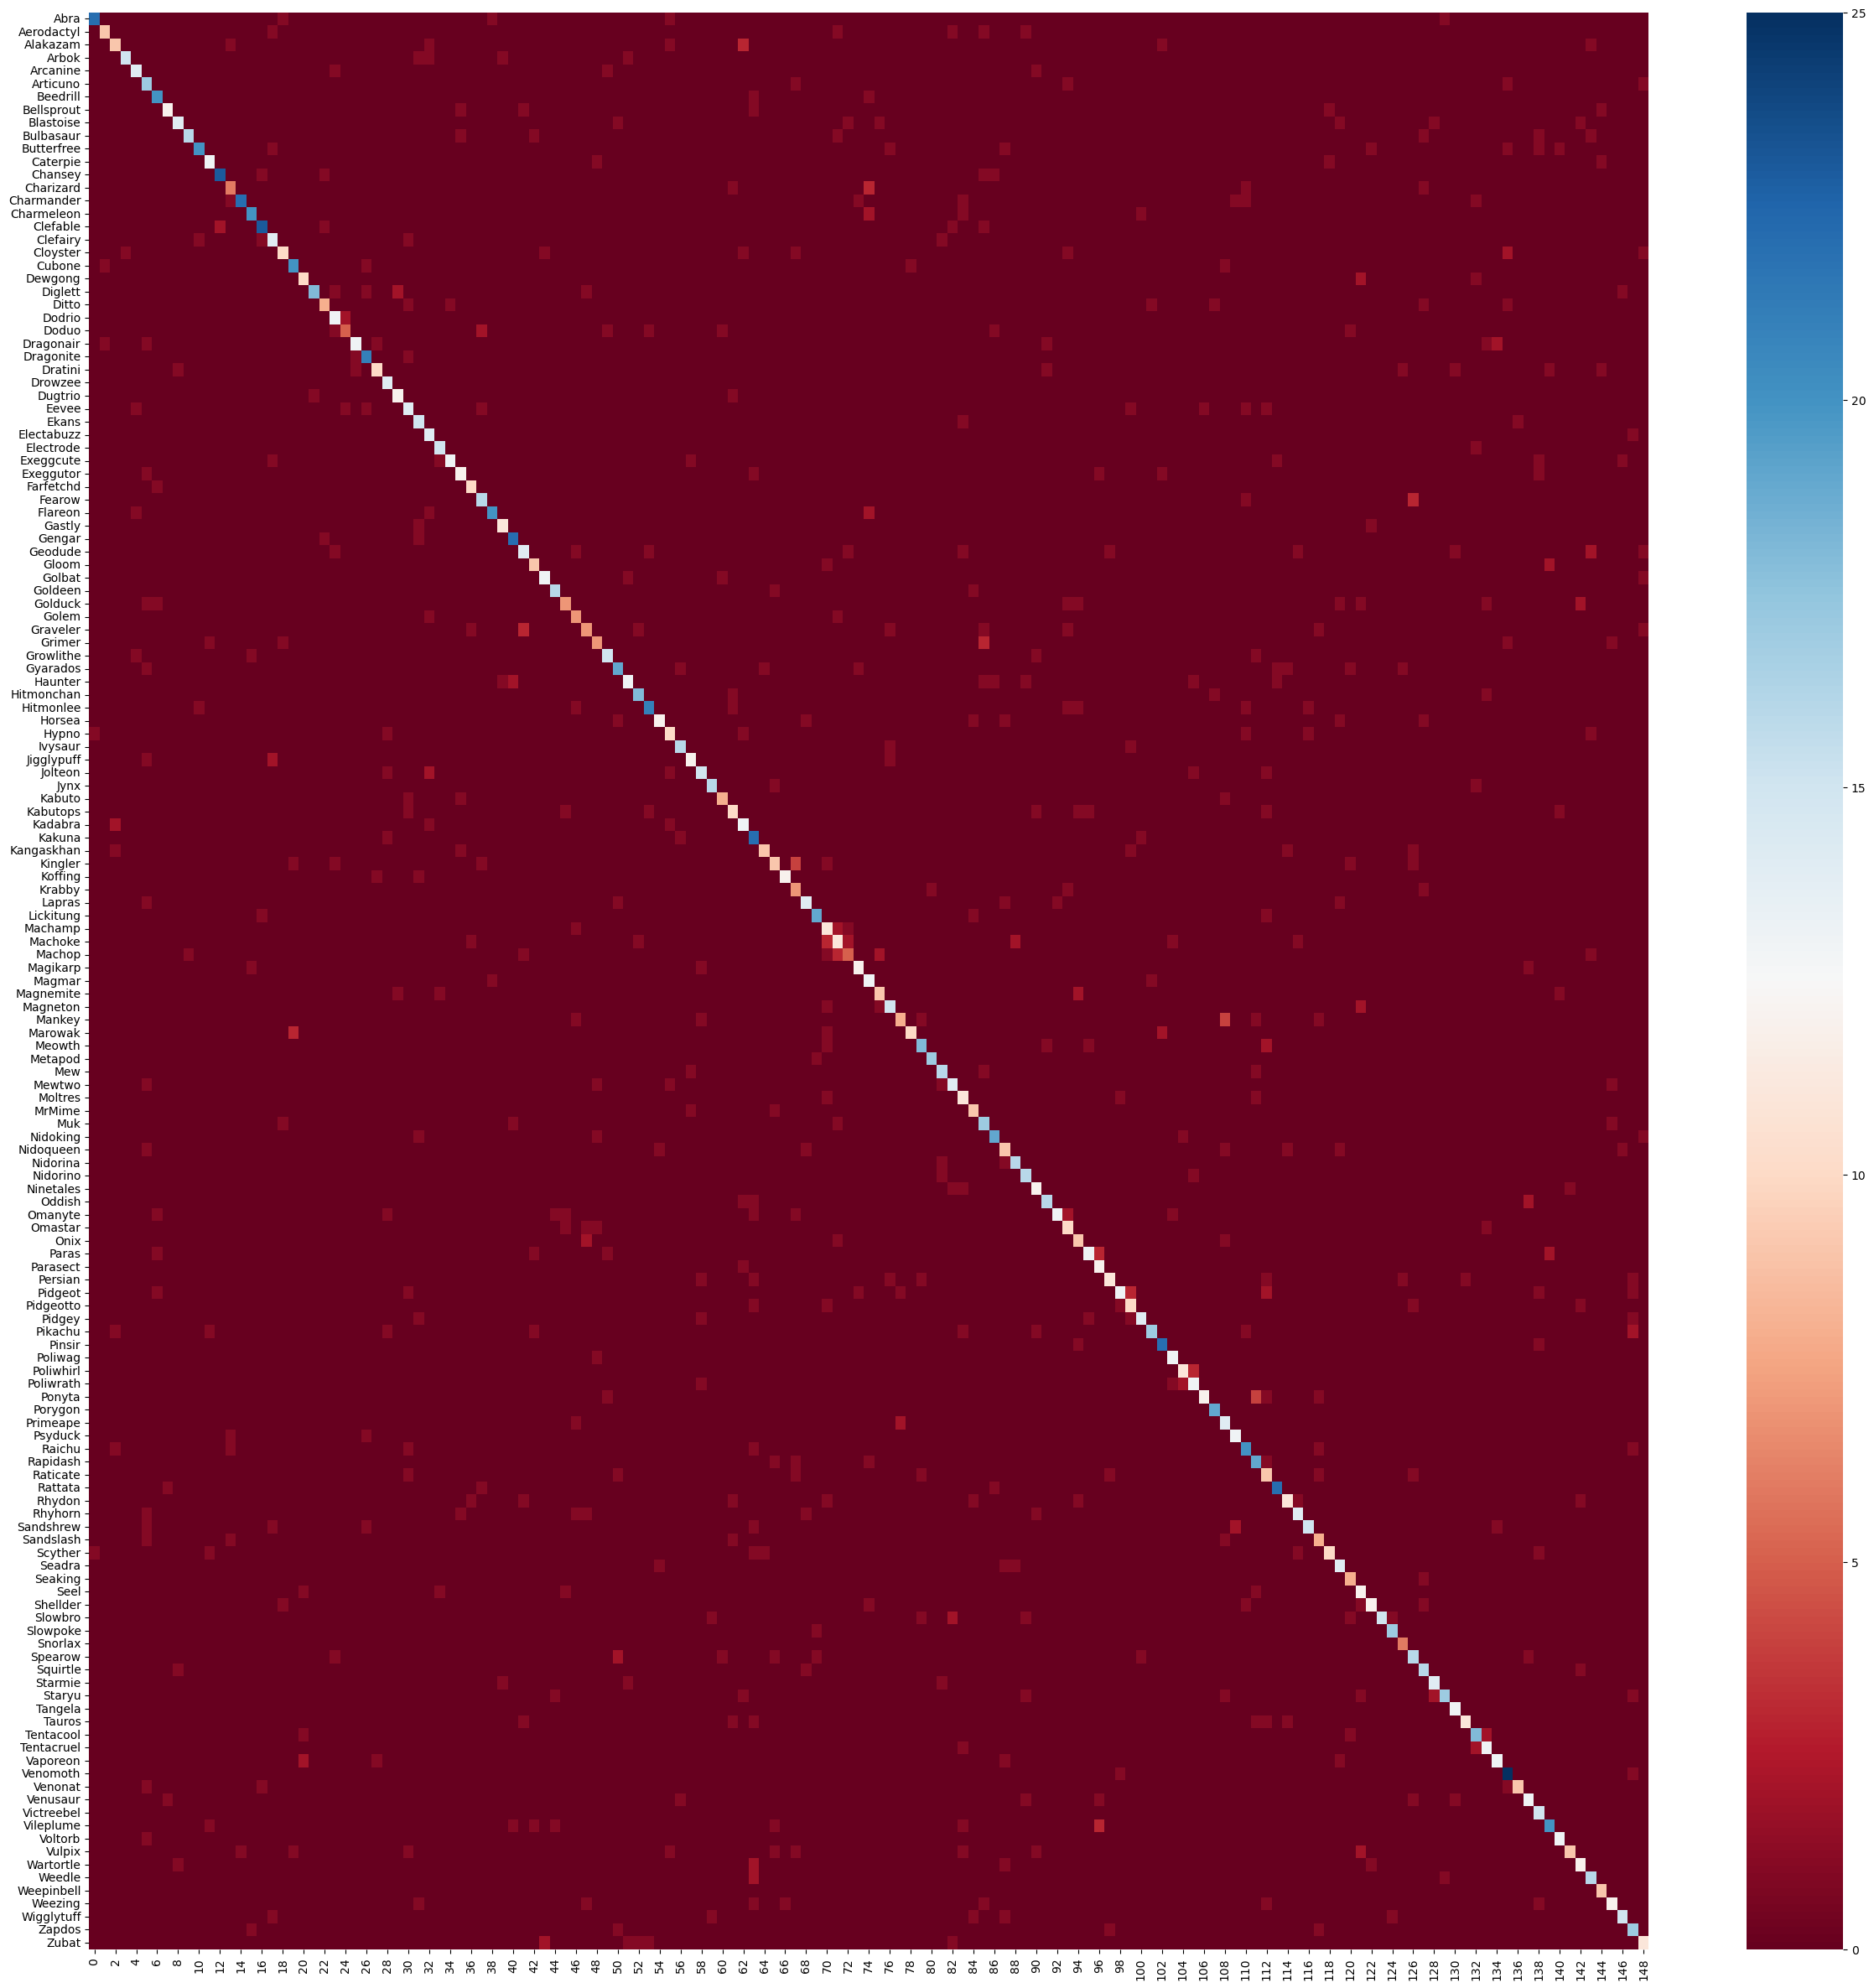

In [26]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

fig, axes = plt.subplots( figsize=(30,30))
sns.heatmap(confusion_matrix(y_true, y_pred_lab, labels=class_names),yticklabels=class_names, ax=axes, cmap="RdBu" )

In [27]:
print(classification_report(y_true, y_pred_lab, labels=class_names, ))

              precision    recall  f1-score   support

        Abra       0.92      0.85      0.88        26
  Aerodactyl       0.82      0.64      0.72        14
    Alakazam       0.64      0.53      0.58        17
       Arbok       0.94      0.79      0.86        19
    Arcanine       0.82      0.82      0.82        17
    Articuno       0.57      0.81      0.67        21
    Beedrill       0.80      0.91      0.85        22
  Bellsprout       0.86      0.71      0.77        17
   Blastoise       0.82      0.70      0.76        20
   Bulbasaur       0.94      0.73      0.82        22
  Butterfree       0.91      0.74      0.82        27
    Caterpie       0.76      0.81      0.79        16
     Chansey       0.92      0.85      0.88        27
   Charizard       0.55      0.50      0.52        12
  Charmander       0.96      0.79      0.86        28
  Charmeleon       0.87      0.83      0.85        24
    Clefable       0.85      0.82      0.84        28
    Clefairy       0.67    

In [ ]:
Seel, Alakazam, Dodrio, Dratini, Graveler, Kingler, Krabby, Magmar, Marowak, Persian, Raticate, Sandslash

In [34]:
pics = [i for i in range(len(y_true)) if (y_true[i] != "Kingler") & (y_pred_lab[i] == "Kingler")]

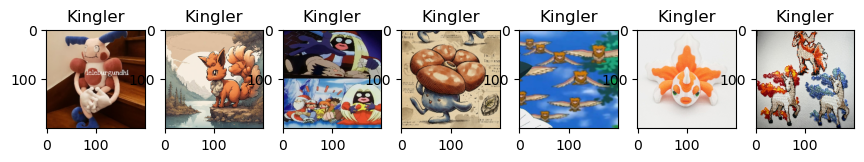

In [35]:
pics = [i for i in range(len(y_true)) if (y_true[i] != "Kingler") & (y_pred_lab[i] == "Kingler")]

plt.figure(figsize=(15,15))
for i in range(len(pics)):
    plt.subplot(5,10,int(i)+1)
    plt.imshow(img_np[pics[i],:,:,:]/255, )
    plt.title(y_pred_lab[pics[i]])

In [162]:
from tensorflow.keras import layers, models

train_ds = tf.data.Dataset.load("tf_data/trains_ds")
val_ds = tf.data.Dataset.load("tf_data/val_ds")

IMG_SIZE = 224
AUTOTUNE = tf.data.AUTOTUNE
batch_size = 64

rescale = tf.keras.Sequential([
    layers.Resizing(IMG_SIZE, IMG_SIZE),
#     layers.Rescaling(1./255)
])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.25),
    layers.RandomZoom(height_factor=(-0.2, 0), width_factor=(-0.2, 0)),
    
])

def prepare(ds, shuffle=False, augment=False):
  # Resize and rescale all datasets.
    ds = ds.map(lambda x, y: (rescale(x), y), 
              num_parallel_calls=AUTOTUNE)
    
    ds = ds.rebatch(batch_size)
    if shuffle:
        ds = ds.shuffle(1000)

  # Batch all datasets.
        ds = ds.rebatch(batch_size)

  # Use data augmentation only on the training set.
    if augment:
        ds = ds.map(lambda x, y: (data_augmentation(x, training=True), y), 
                num_parallel_calls=AUTOTUNE)
#         ds = ds.map(lambda x, y: (tf.image.adjust_hue(x, delta=0.1), y), 
#                 num_parallel_calls=AUTOTUNE)

  # Use buffered prefetching on all datasets.
    return ds.repeat().prefetch(buffer_size=AUTOTUNE)

train_ds = prepare(train_ds, shuffle=True, augment=True)
val_ds = prepare(val_ds)

In [47]:
MobNet = tf.keras.applications.MobileNetV3Small(input_shape=(IMG_SIZE, IMG_SIZE, 3), include_top=False)
MobNet.summary()

Model: "MobileNetV3Small"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_36      │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_8         │ (None, 224, 224,  │          0 │ input_layer_36[0… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv (Conv2D)       │ (None, 112, 112,  │        432 │ rescaling_8[0][0] │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv_bn             │ (None, 112, 112,  │         64 │ conv[0][0]        │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ activation_144      │ (None, 112, 112,  │          0 │ conv_bn[0][0]     │
│ (Activation)        │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 113, 113,  │          0 │ activation_144[0… │
│ (ZeroPadding2D)     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │        144 │ expanded_conv_de… │
│ (DepthwiseConv2D)   │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_dept… │ (None, 56, 56,    │         64 │ expanded_conv_de… │
│ (BatchNormalizatio… │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_112 (ReLU)    │ (None, 56, 56,    │          0 │ expanded_conv_de… │
│                     │ 16)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │          0 │ re_lu_112[0][0]   │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │        136 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 8)   │          0 │ expanded_conv_sq… │
│ (ReLU)              │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 1, 1, 16)  │        144 │ expanded_conv_sq… │
│ (Conv2D)            │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ add_72 (Add)        │ (None, 1, 1, 16)  │          0 │ expanded_conv_sq… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ re_lu_113 (ReLU)    │ (None, 1, 1, 16)  │          0 │ add_72[0][0]      │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ multiply_72         │ (None, 1, 1, 16)  │          0 │ re_lu_113[0][0]   │
│ (Multiply)          │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ expanded_conv_sque… │ (None, 56, 56,    │          0 │ re_lu_112[0][0],  │
│ (Multiply)          │ 16)               │            │ multiply_72[0][0] │
├─────────────────────┼───────────────────┼────────────┼─────────────────

 Total params: 939,120 (3.58 MB)

 Trainable params: 927,008 (3.54 MB)

 Non-trainable params: 12,112 (47.31 KB)

In [44]:
global_avg = layers.GlobalAveragePooling2D(keepdims=False)
dense_layer = layers.Dense(256, activation='relu')
prediction_layer = layers.Dense(149, activation='softmax')
MobNet.trainable = True

# for layer in MobNet.layers[-min(len(MobNet.layers), 30):]:
#         layer.trainable = True

input = tf.keras.Input(shape = (IMG_SIZE, IMG_SIZE, 3),)
output = MobNet(input, training=False)
output = global_avg(output)
output = layers.Dropout(0.25)(output)
output = layers.BatchNormalization()(output, training = False)
output = dense_layer(output)
output = prediction_layer(output)

model = models.Model(inputs=input, outputs=output)

model.summary()

Model: "functional_25"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_33 (InputLayer)     │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MobileNetV3Small (Functional)   │ (None, 7, 7, 576)      │       939,120 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_7      │ (None, 576)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 576)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 576)            │         2,304 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_14 (Dense)                │ (None, 256)            │       147,712 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 149)            │        38,293 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,127,429 (4.30 MB)

 Trainable params: 1,114,165 (4.25 MB)

 Non-trainable params: 13,264 (51.81 KB)

# Model training below

In [55]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD

opt = Adam(learning_rate=0.001)
early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor="val_loss", factor=0.333, patience=3, min_lr=0.00001)

model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, epochs=100,  callbacks=[early_stop, reduce_lr], 
          verbose=True, steps_per_epoch=766//2,validation_data=val_ds,  validation_steps=85//2+1)

Epoch 1/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1516s 4s/step - accuracy: 0.7939 - loss: 0.7788 - val_accuracy: 0.6997 - val_loss: 1.3397 - learning_rate: 0.0010
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1367s 4s/step - accuracy: 0.8331 - loss: 0.5896 - val_accuracy: 0.7357 - val_loss: 1.1371 - learning_rate: 0.0010
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1372s 4s/step - accuracy: 0.8619 - loss: 0.4947 - val_accuracy: 0.7420 - val_loss: 1.0596 - learning_rate: 0.0010
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1374s 4s/step - accuracy: 0.8699 - loss: 0.4458 - val_accuracy: 0.7030 - val_loss: 1.2735 - learning_rate: 0.0010
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1358s 4s/step - accuracy: 0.8789 - loss: 0.4095 - val_accuracy: 0.7339 - val_loss: 1.1315 - learning_rate: 0.0010
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1361s 4s/step - accuracy: 0.8923 - loss: 0.3536 - val_accuracy: 0.7409 - val_loss: 1.2346 - learning_rate: 0.0010
Epoch 7/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1390s 4s/step - accuracy: 0.9

KeyboardInterrupt: 

In [164]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam, SGD

early_stop = EarlyStopping(monitor='val_accuracy', mode='max', patience=5,  restore_best_weights=True)
opt = Adam(learning_rate=0.00001)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(train_ds, epochs=100,  callbacks=[early_stop], 
          verbose=True, steps_per_epoch=766//2,validation_data=val_ds,  validation_steps=85//2+1)

Epoch 1/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1821s 4s/step - accuracy: 0.9603 - loss: 0.1493 - val_accuracy: 0.9647 - val_loss: 0.1509
Epoch 2/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1478s 4s/step - accuracy: 0.9660 - loss: 0.1291 - val_accuracy: 0.9647 - val_loss: 0.1509
Epoch 3/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1433s 4s/step - accuracy: 0.9659 - loss: 0.1229 - val_accuracy: 0.9640 - val_loss: 0.1523
Epoch 4/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1349s 4s/step - accuracy: 0.9672 - loss: 0.1259 - val_accuracy: 0.9640 - val_loss: 0.1530
Epoch 5/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1349s 4s/step - accuracy: 0.9665 - loss: 0.1261 - val_accuracy: 0.9644 - val_loss: 0.1528
Epoch 6/100
383/383 ━━━━━━━━━━━━━━━━━━━━ 1356s 4s/step - accuracy: 0.9657 - loss: 0.1260 - val_accuracy: 0.9647 - val_loss: 0.1536


In [165]:
model.save_weights("mobnet_v3.weights.h5")
# model.save_weights("model_.weights.h5")

In [166]:
model.save("mobnet_224.keras")

In [3]:
model = tf.keras.models.load_model("mobnet_224.keras")

In [4]:
class_names = np.load("class_names.npy")

84

In [61]:
val_ds = tf.data.Dataset.load("tf_data/val_ds")
val_ds = val_ds.repeat(1)
model.evaluate(val_ds, steps=84)

84/84 ━━━━━━━━━━━━━━━━━━━━ 36s 426ms/step - accuracy: 0.9775 - loss: 0.0875


[0.0956718921661377, 0.9749906659126282]

In [62]:
val_ds = tf.data.Dataset.load("tf_data/val_ds")
val_ds = val_ds.repeat(1)
y_true = []

img_np = np.array(next(iter(val_ds))[0])
for img_batch, label_batch in val_ds:
    img_np = np.concatenate((img_np,img_batch))
    for label in label_batch:
        y_true.append(class_names[np.argmax(np.array(label))])

len(y_true)  

2024-10-09 14:59:20.802901: W tensorflow/core/framework/local_rendezvous.cc:404] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


2679

In [63]:
img_np = img_np[32:,:,:,:]

In [64]:
img_np.shape

(2679, 224, 224, 3)

In [65]:
y_pred = model.predict(val_ds)
y_pred_lab = []

for pred in y_pred:
    y_pred_lab.append(class_names[np.argmax(pred)]) 

84/84 ━━━━━━━━━━━━━━━━━━━━ 32s 376ms/step


In [66]:
len(y_pred_lab)

2679

In [67]:
from sklearn.metrics import classification_report
import pandas as pd
class_report = classification_report(y_true, y_pred_lab, output_dict=True)
class_report = pd.DataFrame(class_report).transpose()
# class_report.sort_values(by="recall")[:10]
class_report

,precision,recall,f1-score,support
Abra,1.000000,0.884615,0.938776,26.000000
Aerodactyl,1.000000,1.000000,1.000000,14.000000
Alakazam,1.000000,0.823529,0.903226,17.000000
Arbok,1.000000,1.000000,1.000000,19.000000
Arcanine,1.000000,0.882353,0.937500,17.000000
...,...,...,...,...
Zapdos,0.958333,1.000000,0.978723,23.000000
Zubat,1.000000,0.944444,0.971429,18.000000
accuracy,0.974991,0.974991,0.974991,0.974991
macro avg,0.974561,0.975544,0.974189,2679.000000


In [68]:
len(pics)

73

In [69]:
poke = class_report.sort_values(by="recall").index[30]
pics = [i for i in range(len(y_true)) if (y_true[i]!=y_pred_lab[i])]

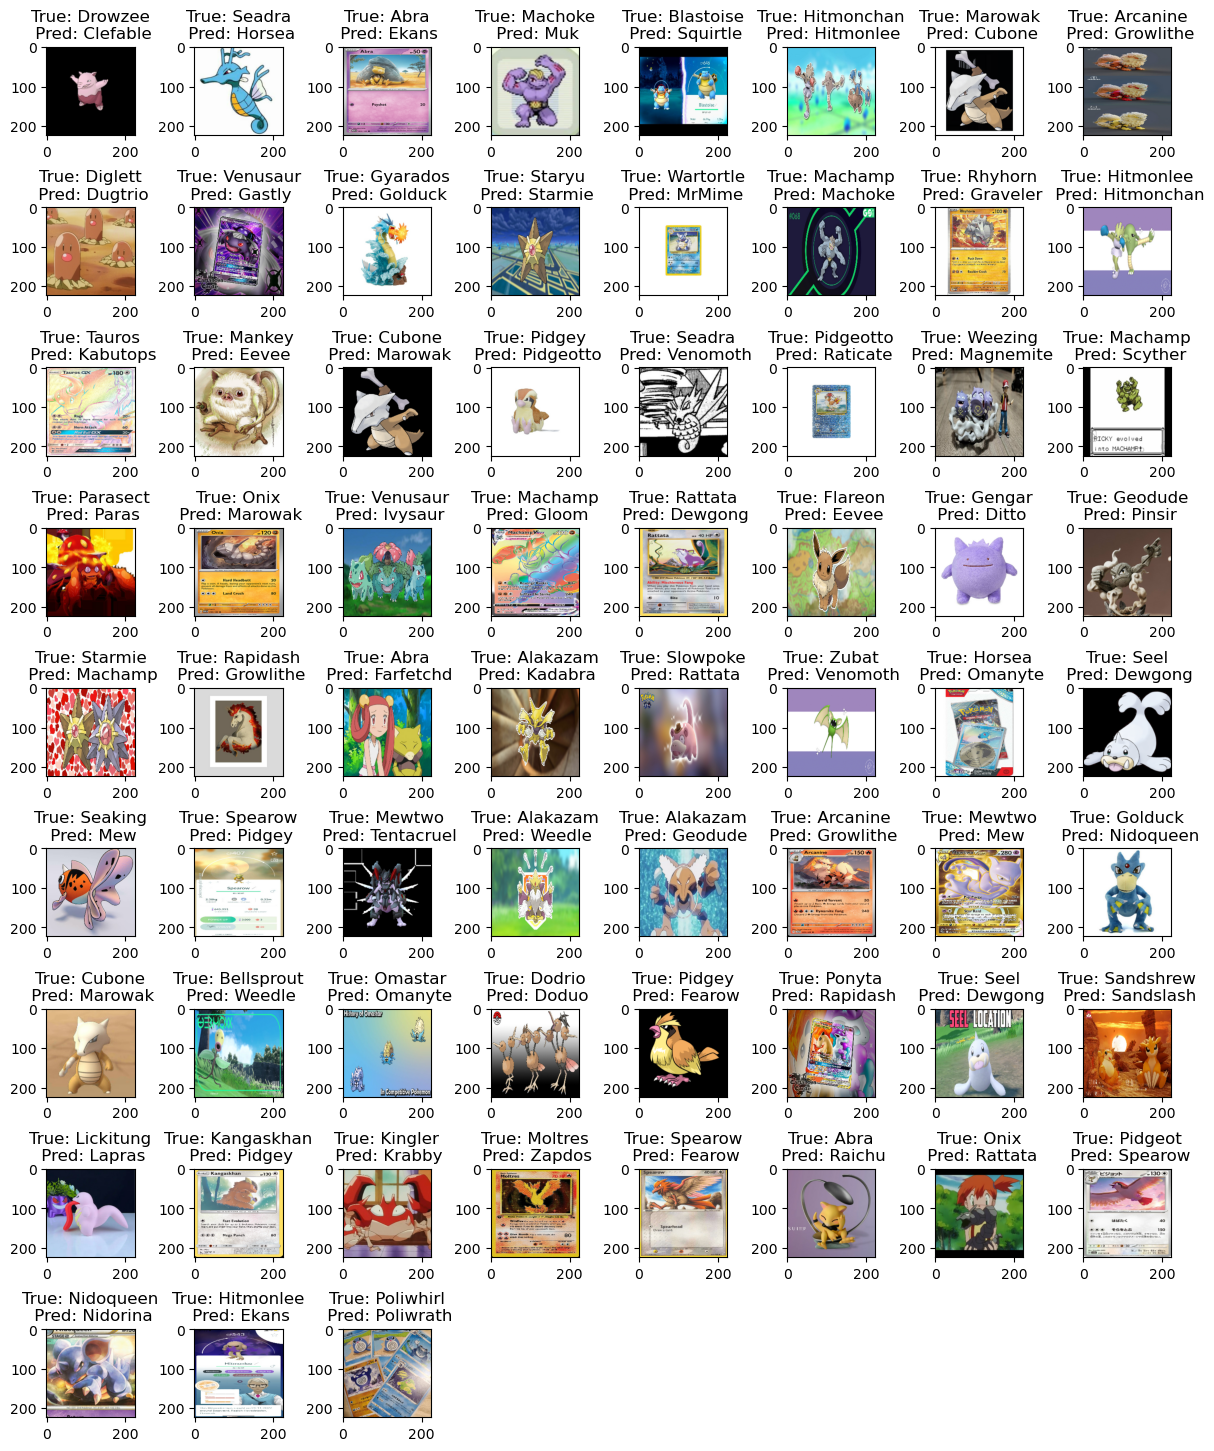

In [70]:
fig = plt.figure(figsize=(12,40))
for i in range(len(pics)):
    plt.subplot(25,8,int(i)+1)
    plt.imshow(img_np[pics[i],:,:,:]/255, )
    plt.title(label= "True: " + y_true[pics[i]] + "\n Pred: " + y_pred_lab[pics[i]])
    
plt.tight_layout()
plt.show()